<h1><center>Bike Sharing Assignment</center></h1>
<h4><center>By : Sai Manish Akula</center></h4>

# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


Essentially, the company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


### Steps involved in predictive the demand for shared bikes and finding those variables

1) Data understanding and EDA
    - Adding dummy variables
2) Data Preparation for modelling (train and test data, Scalling)
    - Split data into train and test data
    - Scalling
3) Model Building
4) Residual Analysis of the train data
5) Model Evaluation
6) Conclusion

<h2><center>1. Data understanding and EDA</center></h2>

In [1]:
# import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Supress Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
bs = pd.read_csv("day.csv")
bs.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
bs.shape

(730, 16)

In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Implies no null values and hence no imputation needed. </br>
dteday column is of object data type actually it should be of date datatype but we are going to drop this column as it is redundant.

### 1.1 Analsing cnt, casual and registered columns

In [5]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[5,3])
colors = (0,0,0)
area = np.pi*3
sns.lmplot(x='instant', y='cnt', data=bs)
plt.title('Scatter plot cnt vs instant')
plt.xlabel('instant')
plt.ylabel('cnt')
plt.show()

<Figure size 500x300 with 0 Axes>

**We can observe the fitted regression line between counts of users and instances. Which makes us convince that we can go ahead and apply Linear regression model.**

In [6]:
plt.figure(figsize=[5,3])
sns.distplot(bs.cnt)
plt.show()

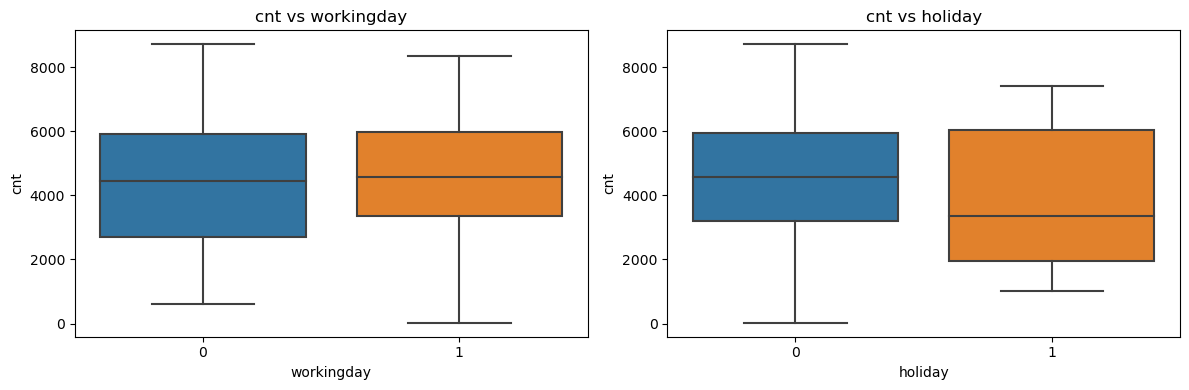

In [7]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create box plots for each group
sns.boxplot(x='workingday', y='cnt', data = bs, ax=axes[0])
sns.boxplot(x='holiday', y='cnt', data = bs, ax=axes[1])

# Set labels and titles for each subplot
axes[0].set_title('cnt vs workingday')
axes[1].set_title('cnt vs holiday')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot

plt.show()

The medians of both working day and non working days are almost same. Suggesting that usage is more on Holidays + weekends.</br>
</br>
So we can go with `workingday` as it gives us combined picture of both weekday and weekends/holidays.

It is better to drop those columns which are not useful in our Analysis and building the model as we will be mostly focusing on predictor variables.</br>
    For this purpose we can go ahead and drop columns `instant`, `dteday` , `casual` and `registered`

### 1.2 Removing unnecessary columns and renaming few columns

* hum: humidity
* cnt: count
* mnth: month
* yr: year

In [8]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.
bs.drop('holiday',axis=1,inplace=True)

# Dropping the dteday,instant,casual and registered columns.
bs.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

# Renaming some columns for better understanding
bs.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

In [9]:
bs.head()

season  year  month  weekday  workingday  weathersit       temp     atemp  \
0       1     0      1        6           0           2  14.110847  18.18125   
1       1     0      1        0           0           2  14.902598  17.68695   
2       1     0      1        1           1           1   8.050924   9.47025   
3       1     0      1        2           1           1   8.200000  10.60610   
4       1     0      1        3           1           1   9.305237  11.46350   

   humidity  windspeed  count  
0   80.5833  10.749882    985  
1   69.6087  16.652113    801  
2   43.7273  16.636703   1349  
3   59.0435  10.739832   1562  
4   43.6957  12.522300   1600

### 1.3: Encoding the Labels & Visualization

#### **1) season**

1:spring,  2:summer,  3:fall,  4:winter

In [10]:
codes = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
bs['season'] = bs['season'].map(codes)

In [11]:
plt.figure(figsize=[5,3])
sns.barplot(data= bs, x='season',y='count')
plt.show()

**Bike rentals are more during the Fall season**

#### **2) weathersit**

* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    

In [12]:
codes = {1:'Clear',2:'Mist_Cloudy',3:'Light_Snow_Rain',4:'Heavy_Rain'}
bs['weathersit'] = bs['weathersit'].map(codes)

In [13]:
plt.figure(figsize=[5,3])
sns.barplot(data= bs, x='weathersit',y='count')
plt.show()

**Bikes are usually rented more during clear or partly clouded weather conditions. We can also observe that in these 2 years 2018 and 2019, not even a single bike is rented during Heavy rain days with Thunderstorms or with Snow+Fog**

#### **3) workingday**

* if day is neither weekend nor holiday is 1,
* otherwise is 0

In [14]:
codes = {1:'working_day',0:'Holiday'}
bs['workingday'] = bs['workingday'].map(codes)

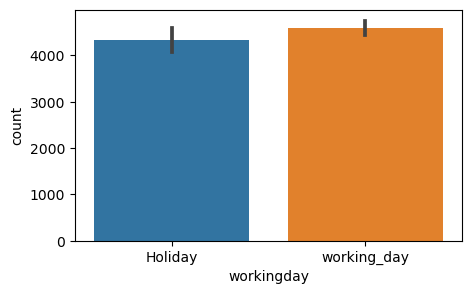

In [15]:
plt.figure(figsize=[5,3])
sns.barplot(data= bs, x='workingday',y='count')
plt.show()

**In a week (excluding holidays) there are usually 5 weekdays/working_days and 2 weekends (sat and sun). Though the count of bike sharing is more on working_day, Holiday counts are almost nearer to working_day. This implies that people tend to use bikes more on Holidays**

#### **4) year**

* 2018:0
* 2019:1

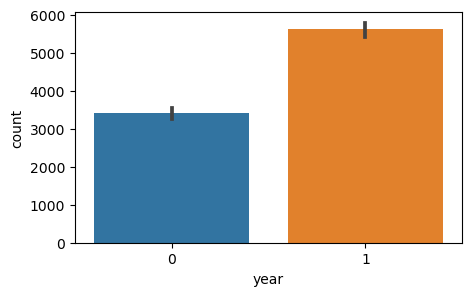

In [16]:
plt.figure(figsize=[5,3])
sns.barplot(data= bs, x='year',y='count')
plt.show()

Bike sharing company and user base as increased in 2019 when compared to 2018, the year in which it started.

#### **5) Month**

* 1:Jan
* 2:Feb
* 3:Mar
* 4:Apr
* 5:May
* 6:June
* 7:July
* 8:Aug
* 9:Sep
* 10:Oct
* 11:Nov
* 12:Dec

In [17]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bs['month'] = bs['month'].map(codes)

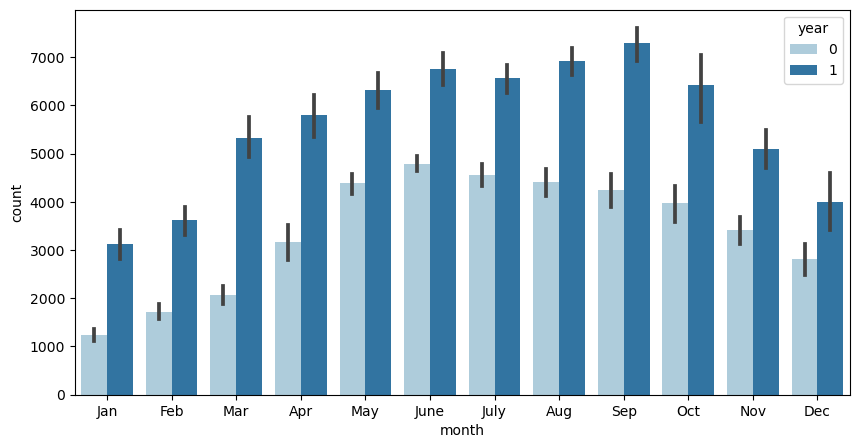

In [18]:
plt.figure(figsize=[10,5])
sns.barplot(data= bs, x='month',y='count',hue='year',palette='Paired')
plt.show()

**Bike Rental has increased approximately during the months between June to October** Which is also the months of Fall season.

#### **6) WeekDay:**

* 0:Mon
* 1:Tue
* 2:Wed
* 3:Thu
* 4:Fri
* 5:Sat
* 6:Sun

In [19]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bs['weekday'] = bs['weekday'].map(codes)

In [20]:
plt.figure(figsize=[5,4])
sns.barplot(data= bs, x='weekday',y='count',hue='year',palette='Paired')
plt.show()

In 2018 and 2019, most of the bike rentals happened on weeekends only.

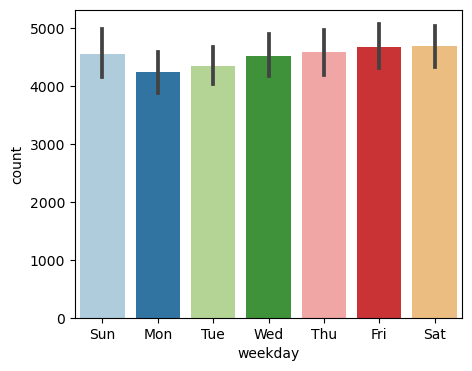

In [21]:
plt.figure(figsize=[5,4])
sns.barplot(data= bs, x='weekday',y='count',palette='Paired')
plt.show()

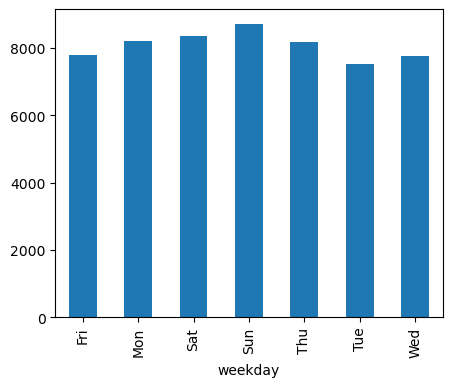

In [22]:
plt.figure(figsize=[5,4])
bs.groupby('weekday')['count'].max().plot(kind='bar')
plt.show()

Seems lik bike rentals are happeneing max on Saturdays and Sundays

### 1.4: Visualizing the Relationship among variables

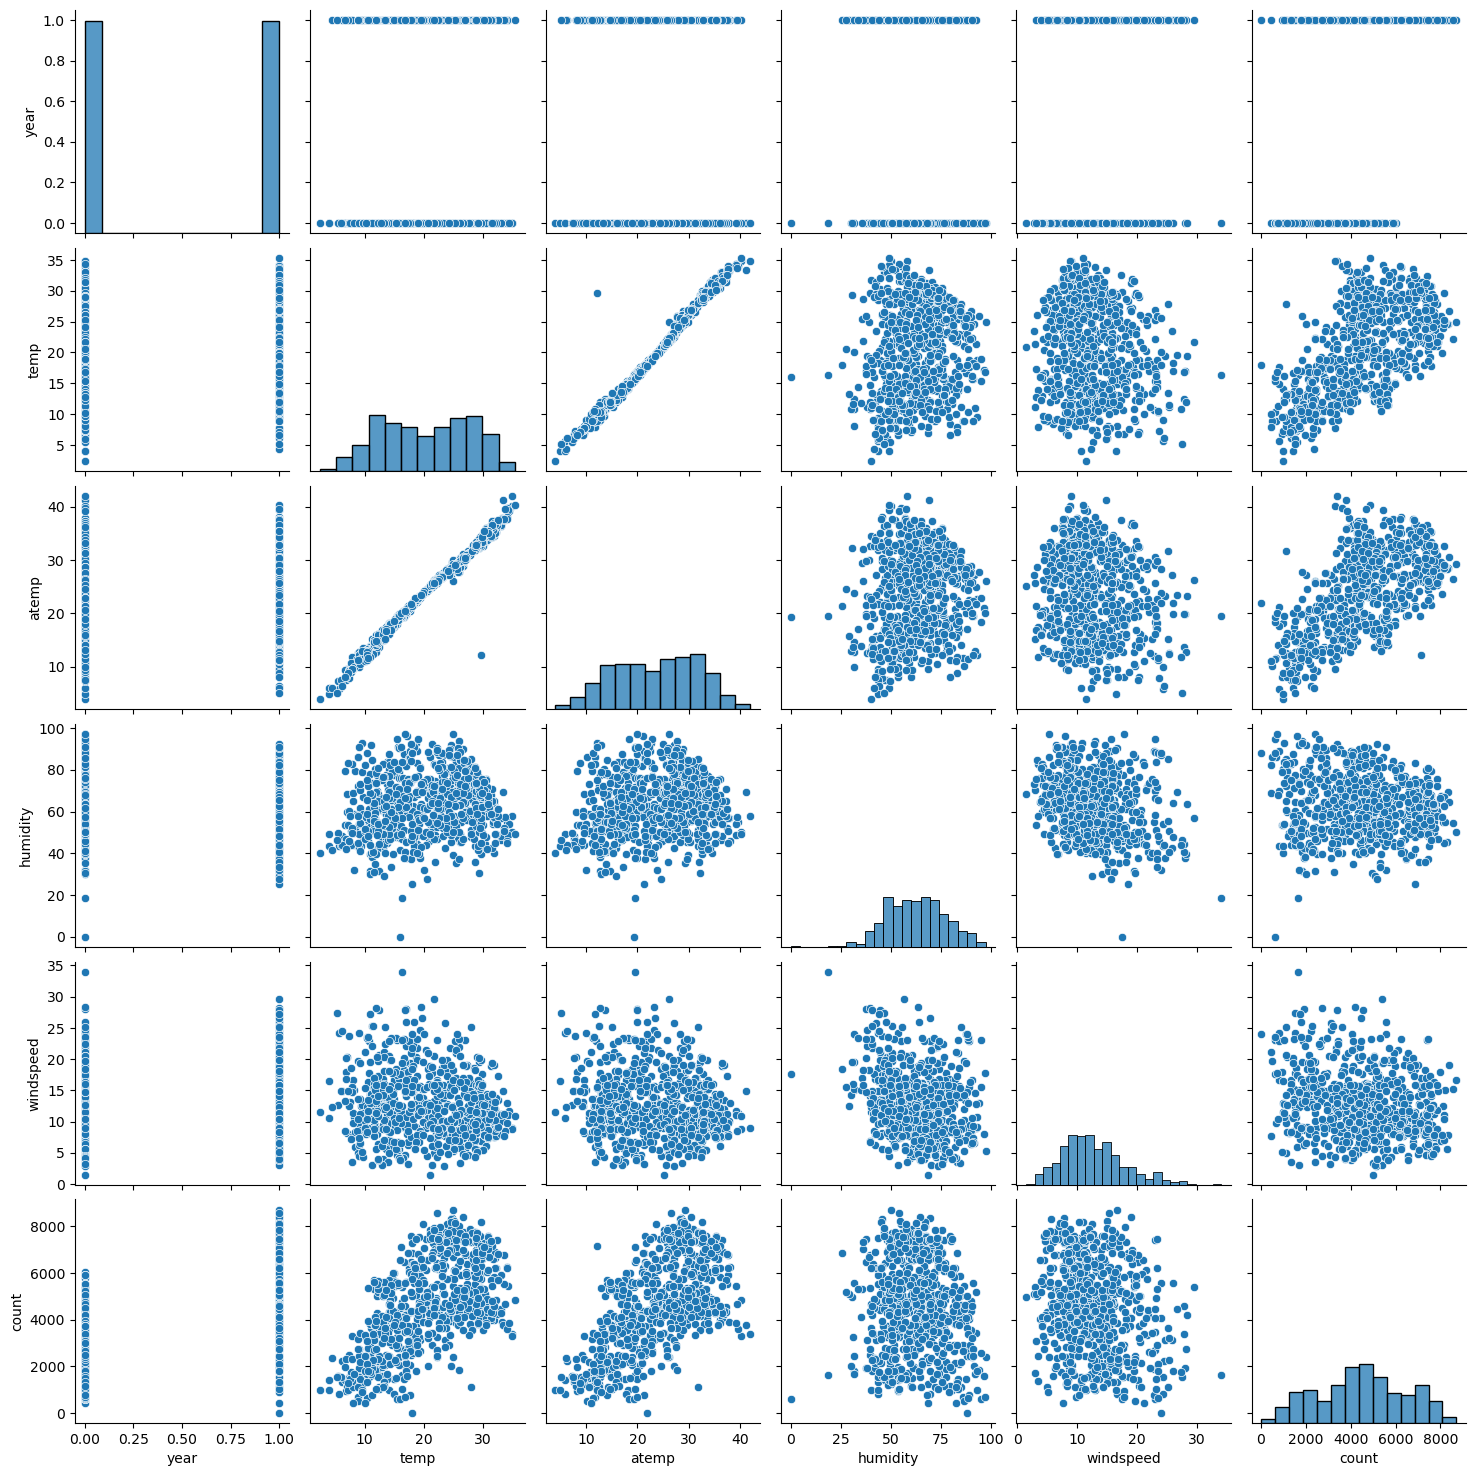

In [23]:
# Let's make a pairplot of all the numeric variables
sns.pairplot(bs)
plt.show()

Few observations from above pair plot:
- Bike Rentals are observed at higher temperatures. That too between 10 to 30 degress celsius.
- As Temperature being directly proportional to Humidity, Bike Rentals are more during high humidity.

##### Let's check the correlation coefficients to see which variables are highly correlated

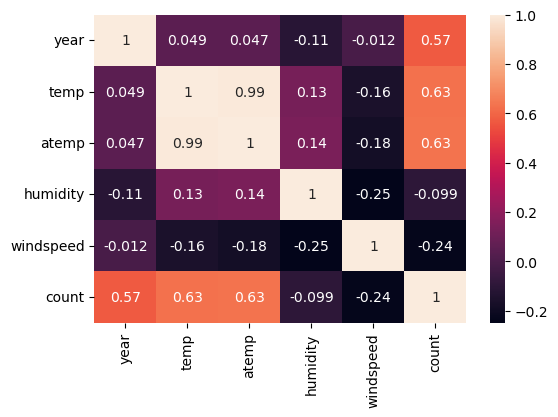

In [24]:
plt.figure(figsize = (6,4))
sns.heatmap(bs.corr(),annot=True)
plt.show()

**It is observed that temp and atemp are highly correlated from above conclusions but we are not sure which to drop. Hence let's keep both columns and one can be dropped to avoid multicollinearity during model building.**

In [25]:
bs.head()

season  year month weekday   workingday   weathersit       temp     atemp  \
0  Spring     0   Jan     Sun      Holiday  Mist_Cloudy  14.110847  18.18125   
1  Spring     0   Jan     Mon      Holiday  Mist_Cloudy  14.902598  17.68695   
2  Spring     0   Jan     Tue  working_day        Clear   8.050924   9.47025   
3  Spring     0   Jan     Wed  working_day        Clear   8.200000  10.60610   
4  Spring     0   Jan     Thu  working_day        Clear   9.305237  11.46350   

   humidity  windspeed  count  
0   80.5833  10.749882    985  
1   69.6087  16.652113    801  
2   43.7273  16.636703   1349  
3   59.0435  10.739832   1562  
4   43.6957  12.522300   1600

### 1.6: Creating Dummy variables for Categorical variables

<h4>Derived metrics</h4>
<h4>Converting Categorical variables (weathersit, season, mnth , weakday and workingday) to dummy variables using one-hot encoding</h4>

In [26]:
# Derived metrics for season and storing in seasons dataframe
seasons = pd.get_dummies(bs['season'],drop_first=True)

# Derived metrics for workingday and storing in working_day dataframe
working_day = pd.get_dummies(bs['workingday'],drop_first=True)

# Derived metrics for weathersit and storing in weather dataframe
weather= pd.get_dummies(bs['weathersit'],drop_first=True)

# Derived metrics for month and storing in month dataframe
month= pd.get_dummies(bs['month'],drop_first=True)

# Derived metrics for weekday and storing in week_day dataframe
week_day= pd.get_dummies(bs['weekday'],drop_first=True)

# Add the results to the original bs dataframe
bs= pd.concat([bs,seasons,working_day,weather,month,week_day],axis=1)

In [27]:
# Dropping the categorical variables as they are already dummy-encoded.

bs.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [28]:
bs.head(5)

year       temp     atemp  humidity  windspeed  count  Spring  Summer  \
0     0  14.110847  18.18125   80.5833  10.749882    985       1       0   
1     0  14.902598  17.68695   69.6087  16.652113    801       1       0   
2     0   8.050924   9.47025   43.7273  16.636703   1349       1       0   
3     0   8.200000  10.60610   59.0435  10.739832   1562       1       0   
4     0   9.305237  11.46350   43.6957  12.522300   1600       1       0   

   Winter  working_day  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  
0       0            0  ...    0    0    0    0    0    0    1    0    0    0  
1       0            0  ...    0    0    0    0    1    0    0    0    0    0  
2       0            1  ...    0    0    0    0    0    0    0    0    1    0  
3       0            1  ...    0    0    0    0    0    0    0    0    0    1  
4       0            1  ...    0    0    0    0    0    0    0    1    0    0  

[5 rows x 29 columns]

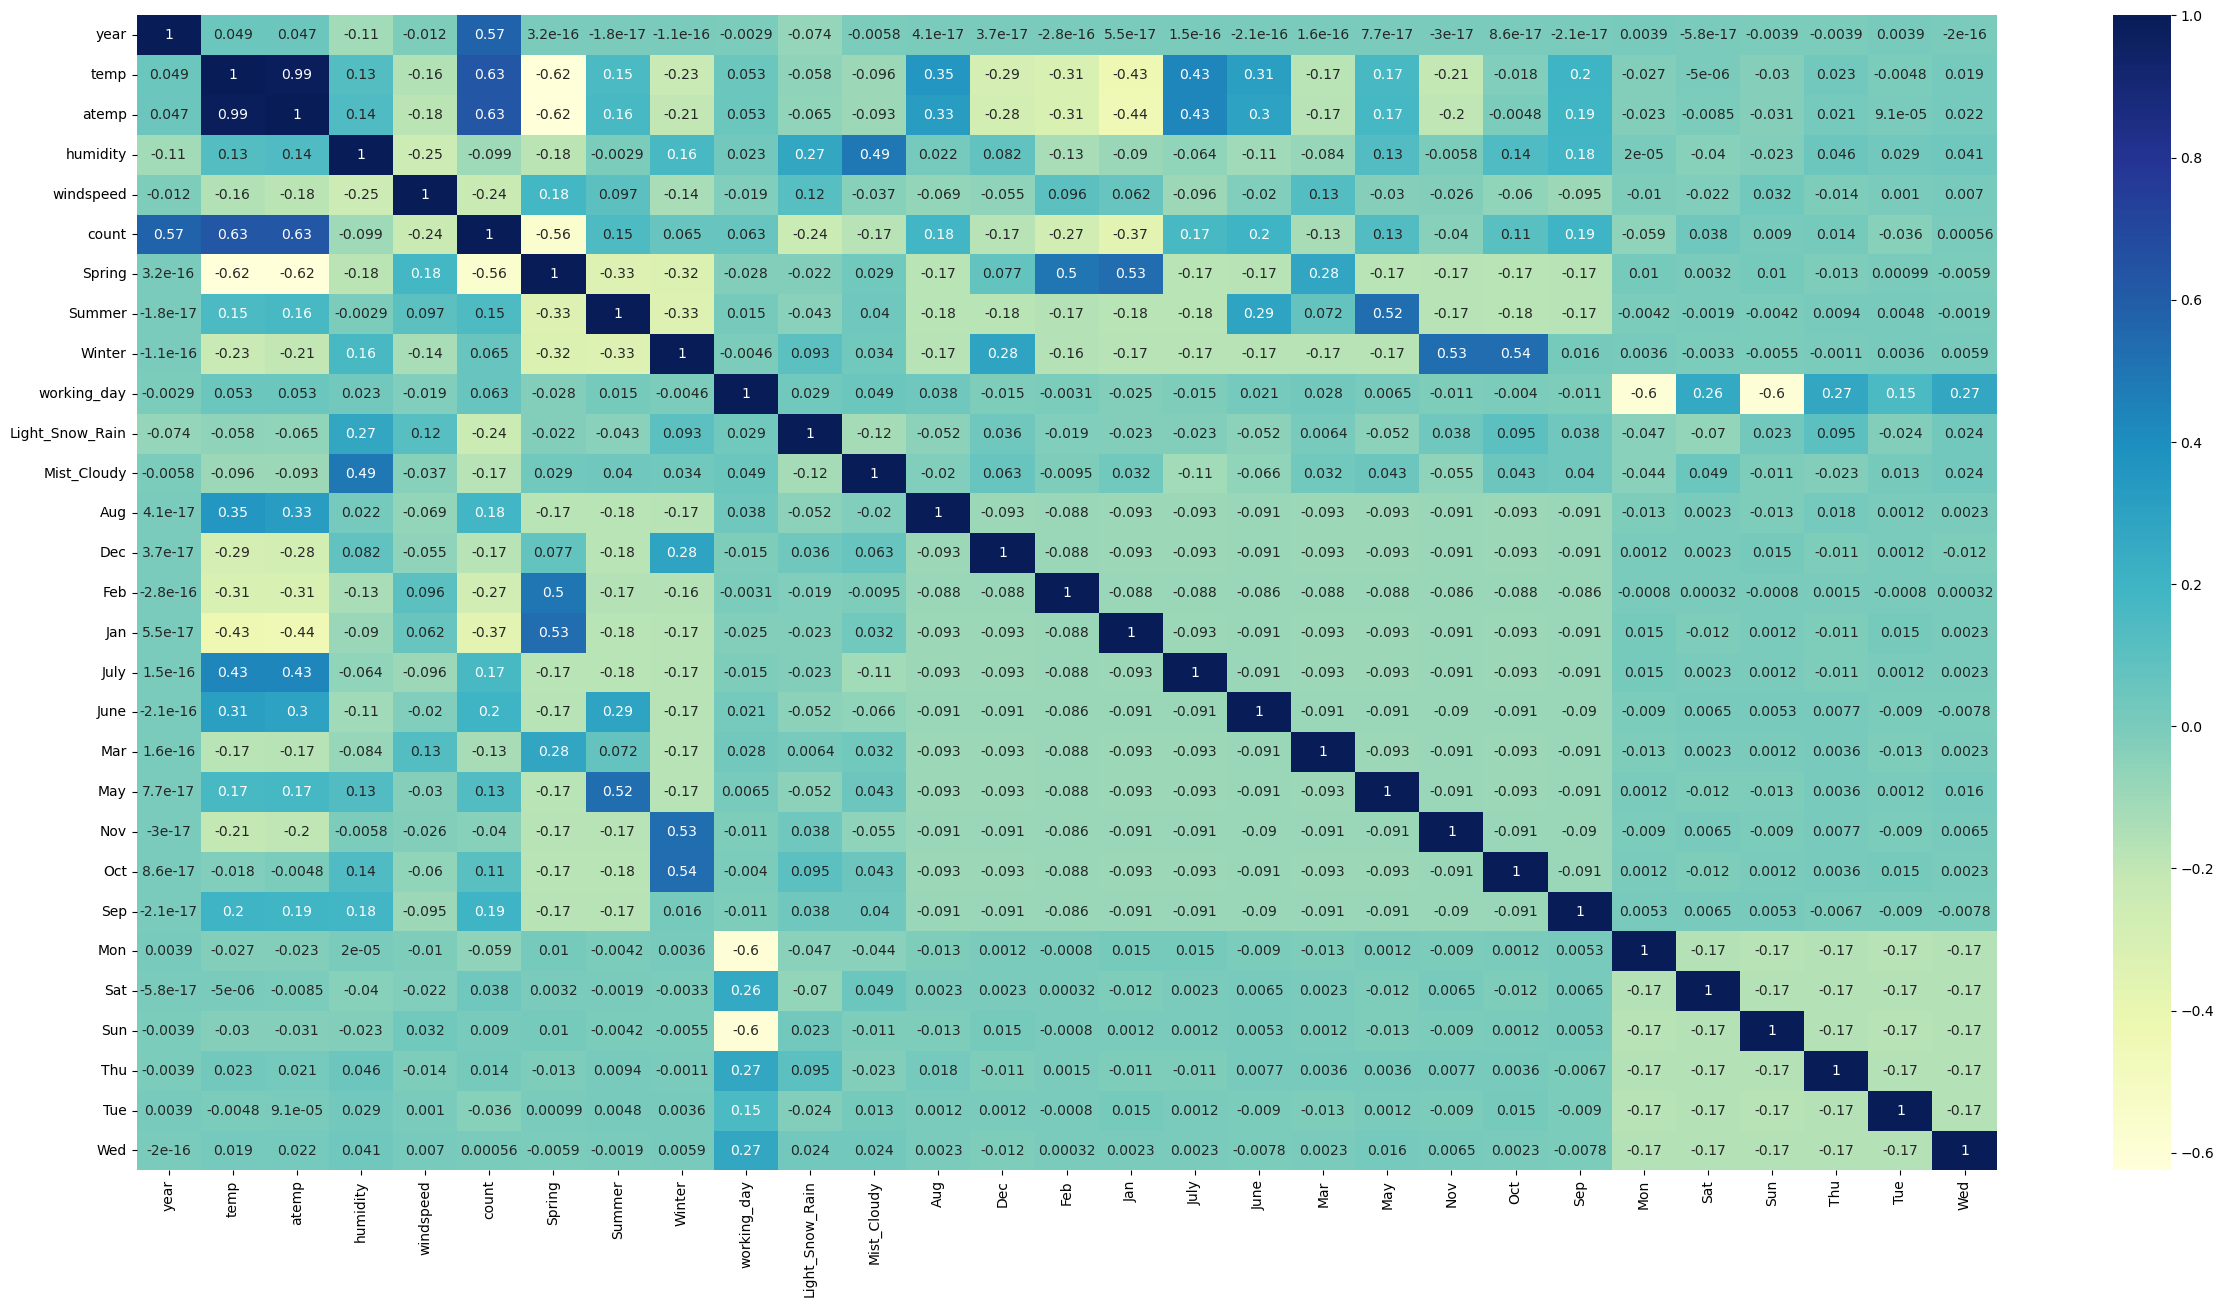

In [29]:
# check heatmap to find how all variables are correlated
plt.figure(figsize = (30,15))
sns.heatmap(bs.corr(),annot = True, cmap="YlGnBu")
plt.show()

We can observe that count of users is highly correlated with temp. So initially we can consider this columns to start building the model.

<h2><center>2. Data Preparation for modelling (train and test data, Scalling)</center></h2>

### 2.1 Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bs, train_size = 0.7, test_size = 0.3, random_state = 100)

#### 2.2 Rescaling the Features
We are using Min-Max scaling for re-scaling

In [31]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head(5)

year      temp     atemp  humidity  windspeed     count  Spring  Summer  \
653     1  0.509887  0.501133  0.575354   0.300794  0.864243       0       0   
576     1  0.815169  0.766351  0.725633   0.264686  0.827658       0       0   
426     1  0.442393  0.438975  0.640189   0.255342  0.465255       1       0   
728     1  0.245101  0.200348  0.498067   0.663106  0.204096       1       0   
482     1  0.395666  0.391735  0.504508   0.188475  0.482973       0       1   

     Winter  working_day  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
653       1            1  ...    0    0    1    0    0    0    0    0    0   
576       0            1  ...    0    0    0    0    0    0    0    0    0   
426       0            0  ...    0    0    0    0    0    0    1    0    0   
728       0            0  ...    0    0    0    0    1    0    0    0    0   
482       0            0  ...    0    0    0    0    0    0    1    0    0   

     Wed  
653    1  
576    1  
426    0  
728    0  
482    0  

[5 rows x 29 columns]

In [33]:
df_train.describe()

year        temp       atemp    humidity   windspeed       count  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.537262    0.512989    0.650369    0.320768    0.513620   
std      0.500429    0.225844    0.212385    0.145882    0.169797    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.339853    0.332086    0.538643    0.199179    0.356420   
50%      1.000000    0.540519    0.526811    0.653714    0.296763    0.518638   
75%      1.000000    0.735215    0.688457    0.754830    0.414447    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Spring      Summer     Winter  working_day  ...         May  \
count  510.000000  510.000000  510.00000   510.000000  ...  510.000000   
mean     0.243137    0.245098    0.24902     0.676471  ...    0.084314   
std      0.429398    0.430568    0.43287     0.468282  ...    0.278131   
min      0.000000    0.000000    0.00000     0.000000  ...    0.000000   
25%      0.000000    0.000000    0.00000     0.000000  ...    0.000000   
50%      0.000000    0.000000    0.00000     1.000000  ...    0.000000   
75%      0.000000    0.000000    0.00000     1.000000  ...    0.000000   
max      1.000000    1.000000    1.00000     1.000000  ...    1.000000   

              Nov         Oct         Sep         Mon         Sat         Sun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.080392    0.143137    0.127451    0.154902   
std      0.281045    0.281045    0.272166    0.350557    0.333805    0.362166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Thu         Tue         Wed  
count  510.000000  510.000000  510.000000  
mean     0.158824    0.150980    0.131373  
std      0.365870    0.358381    0.338139  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

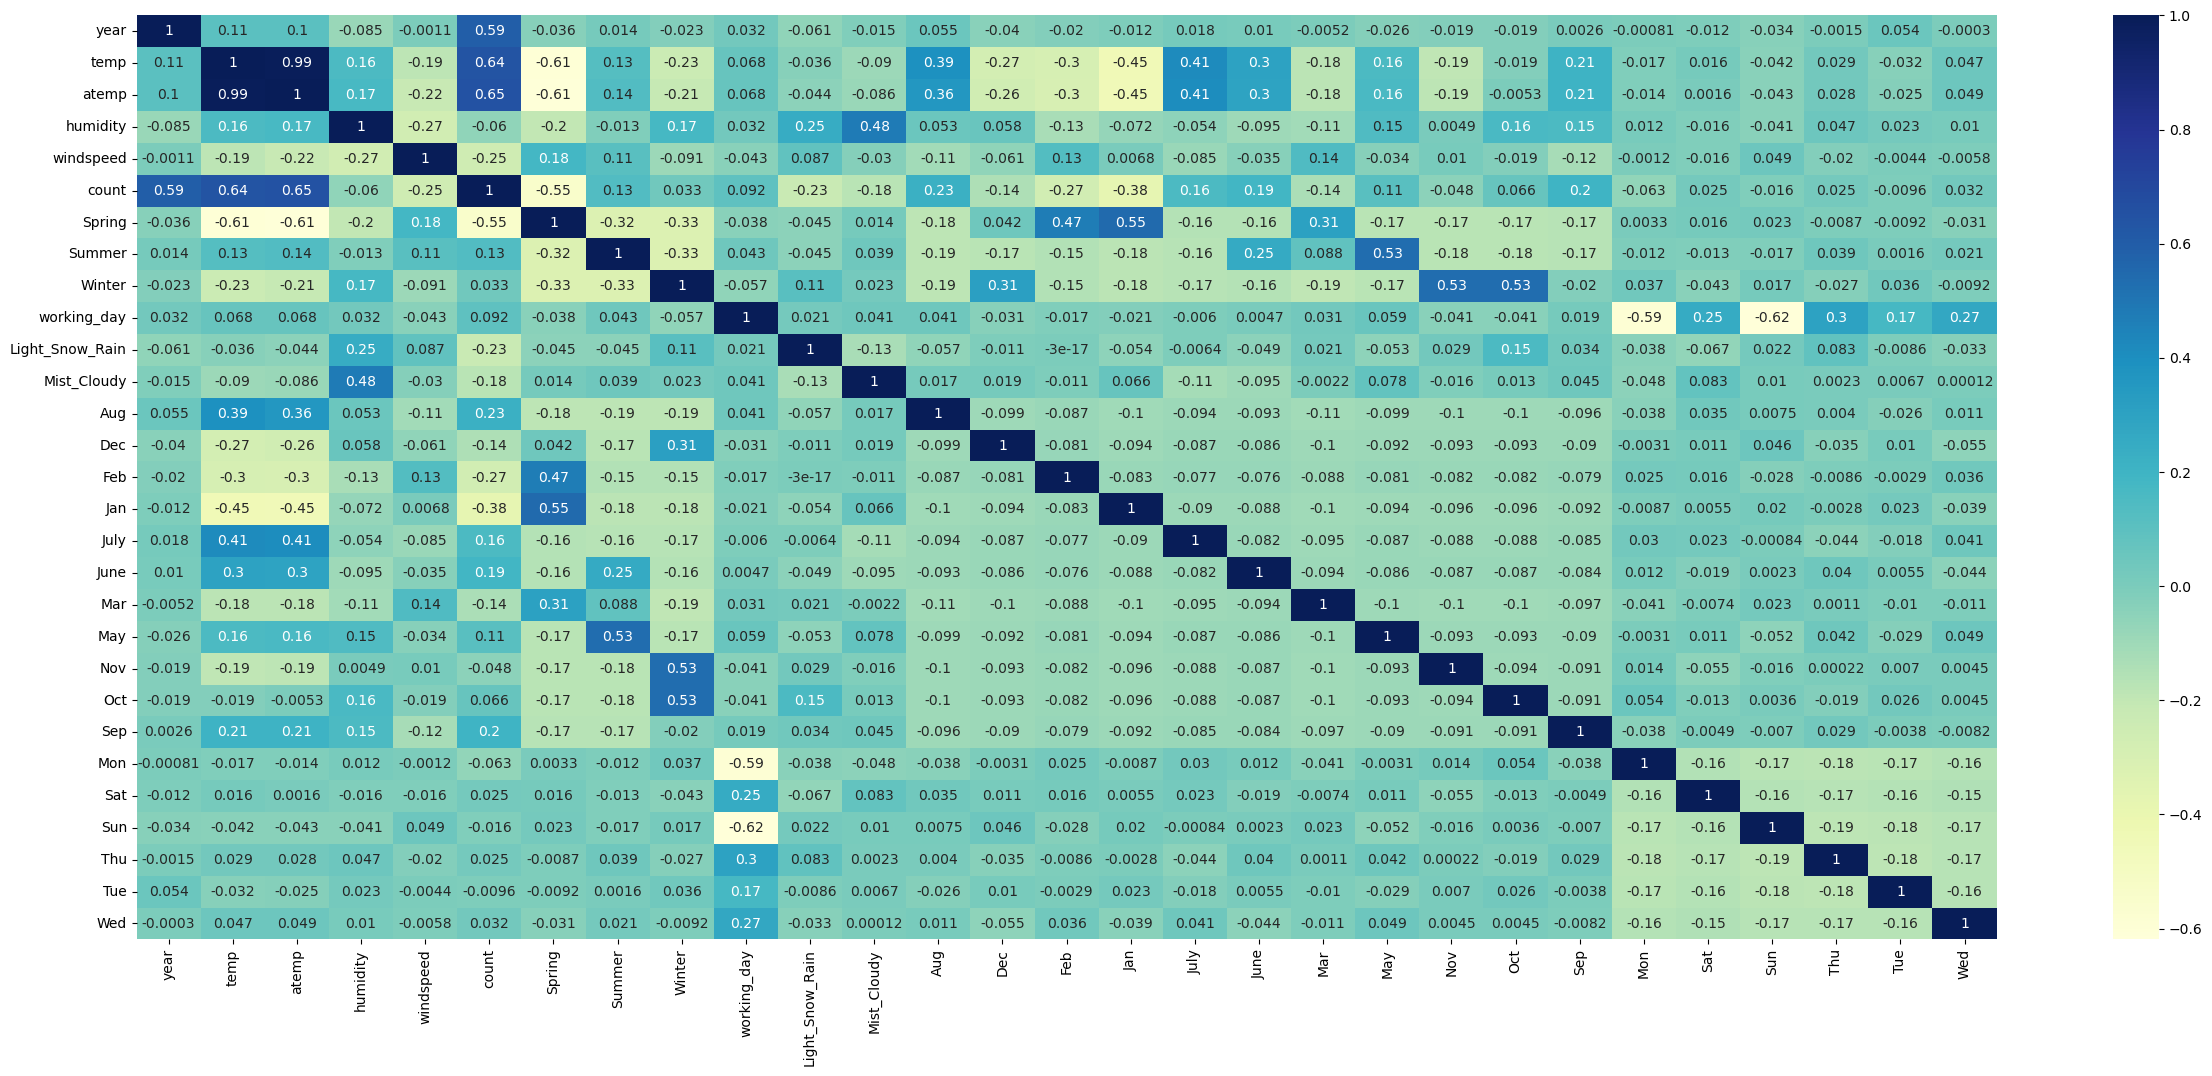

In [34]:
# Let's check the correlation coefficients after scalling to see which variables are highly correlated

plt.figure(figsize = (30, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to the correlated to count of users. This we observed from pairplots as well.

So, we pick temp as the first variable and we'll try to fit a regression line to that.

#### 2.3 Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('count')
X_train = df_train

<h3><center>3. Building a linear model</center></h3>

Fit a regression line through the training data using `statsmodels`. We need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

#### Model-1 (considering only temp variable)

In [36]:
# Add a constant
X_train_lm_1 = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lm_1 = sm.OLS(y_train, X_train_lm_1).fit()

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           5.80e-61
Time:                        21:34:29   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

The R-squared value obtained is 0.414. Since we have so many variables, we can eliminate mode of the variables by using Recursive feature elimination

#### Model- 2 (considering all columns)

***Let's go ahead using RFE (Recursive Feature Elimination)***

### Recursive Feature Elimination

Let's proceed with **`RFE (Recursive Feature Elimination)`** as there are many variables. Let's select top 12 variables.

In [37]:
X_train.columns

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'Spring', 'Summer',
       'Winter', 'working_day', 'Light_Snow_Rain', 'Mist_Cloudy', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', False, 2),
 ('working_day', True, 1),
 ('Light_Snow_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('July', True, 1),
 ('June', False, 16),
 ('Mar', False, 17),
 ('May', False, 9),
 ('Nov', False, 5),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 11),
 ('Wed', False, 12)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'temp', 'humidity', 'windspeed', 'Spring', 'working_day',
       'Light_Snow_Rain', 'Mist_Cloudy', 'July', 'Sep', 'Mon', 'Sun'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe_c1 = sm.add_constant(X_train_rfe)

# Running the linear model
lm_rfe_1 = sm.OLS(y_train,X_train_rfe_c1).fit()

#Let's see the summary of our linear model
print(lm_rfe_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          1.27e-186
Time:                        21:34:29   Log-Likelihood:                 500.28
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2896      0.039     

Let's remove Mon variable as it's probability is 0.05. We consider only those variables whose porbablity is < 0.05

In [41]:
index_list = list(col)  # Convert Index to a list
index_list.remove('Mon')  # Remove the value
col = pd.Index(index_list)  # Convert the modified list back to an Index object if needed
col_2=col
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe_c2 = sm.add_constant(X_train_rfe)

# Running the linear model
lm_rfe_2 = sm.OLS(y_train,X_train_rfe_c2).fit()

#Let's see the summary of our linear model
print(lm_rfe_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          5.53e-187
Time:                        21:34:29   Log-Likelihood:                 498.31
No. Observations:                 510   AIC:                            -972.6
Df Residuals:                     498   BIC:                            -921.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3347      0.031     

In [42]:
col

Index(['year', 'temp', 'humidity', 'windspeed', 'Spring', 'working_day',
       'Light_Snow_Rain', 'Mist_Cloudy', 'July', 'Sep', 'Sun'],
      dtype='object')

We can see that predictor variables probability is almost 0, except for humidity which is 0.03 but still it is in acceptable range. ***Let's go ahead and check VIF for our variables now***

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2          humidity  16.03
1              temp  12.34
5       working_day   4.62
3         windspeed   4.06
7       Mist_Cloudy   2.10
0              year   2.04
4            Spring   1.88
10              Sun   1.81
8              July   1.40
6   Light_Snow_Rain   1.20
9               Sep   1.20

Removing humidity as VIF is high (16.03). We consider only those variables whose VIF is <5. Even 5 to 10 also is acceptable sometimes. 

In [44]:
index_list = list(col)  # Convert Index to a list
index_list.remove('humidity')  # Remove the value
col = pd.Index(index_list)  # Convert the modified list back to an Index object if needed
col_3=col

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe_c3 = sm.add_constant(X_train_rfe)

# Running the linear model
lm_rfe_3 = sm.OLS(y_train,X_train_rfe_c3).fit()

#Let's see the summary of our linear model
print(lm_rfe_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          2.80e-186
Time:                        21:34:29   Log-Likelihood:                 493.79
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     499   BIC:                            -919.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2635      0.020     

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1             temp  6.49
4      working_day  4.30
2        windspeed  3.99
0             year  2.04
9              Sun  1.74
3           Spring  1.63
6      Mist_Cloudy  1.53
7             July  1.34
8              Sep  1.20
5  Light_Snow_Rain  1.07

**Top models:**</br> 
- **Model RFE 3 (lm_rfe_3)**
    - Variables : `temp, working_day, windspeed, year, Sun, Spring, Mist_Cloudy, July, Sep, Light_Snow_Rain`
    - `R-squared = 0.832` and `Adjusted R-squared = 0.829`
    - Probability of all variables is 0 except for Sep which is 0.001 and it is in acceptable range of < 0.05. So we can say coefficients values are not by chance.
    - Prob(F-statistic) : 2.80e-186
    - Durbin-Watson : 2.027</br> 
</br> 

<h1><center>4. Residual Analysis of the train data</center></h1>

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms for top 3 models we picked so we can analyse how the extra parameters are impacting

#### Asumption 1: Error terms are normally distributed (not X, Y)

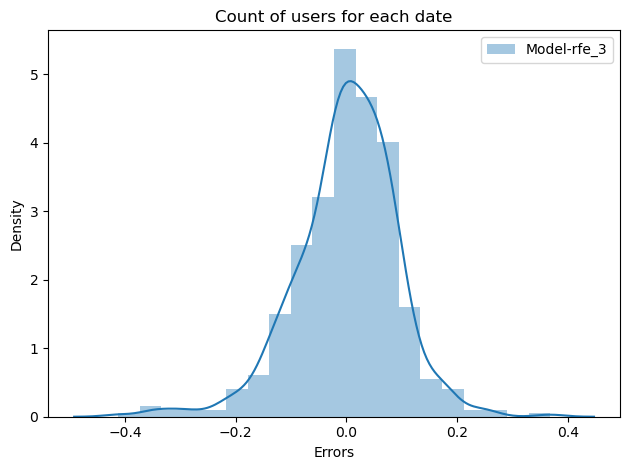

In [46]:
y_train_cnt_rfe_3  = lm_rfe_3.predict(X_train_rfe_c3)

# Create a figure with three subplots
fig, axes = plt.subplots(sharex=True)

sns.distplot((y_train - y_train_cnt_rfe_3), bins = 20, label='Model-rfe_3', ax=axes)

# Add legend
plt.legend()

# Set labels and title
plt.ylabel('Density')
plt.xlabel('Errors')
plt.title('Count of users for each date')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

From above graph we can observe that errors of  model_8 and model_Rfe are more normally distrubuted and inclined more towards 0. As model_ref consists of one extra variable on top of model_8, we are certain that these 2 models are quite good and as model_rfe more R-squared value compared to model_8, we can consider model_rfe as our final mode.

<h1><center>5. Model Evaluation</center></h1>

<h3>Step 5.1 Making Predictions Using the Final Model</h3>

In [47]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
df_test.describe()

year        temp       atemp    humidity   windspeed       count  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.558941    0.532991    0.638508    0.313350    0.520592   
std      0.500722    0.233698    0.217888    0.148974    0.159947    0.218435   
min      0.000000    0.046591    0.025950    0.261915   -0.042808    0.048205   
25%      0.000000    0.354650    0.344751    0.527265    0.198517    0.377531   
50%      0.000000    0.558691    0.549198    0.627737    0.299459    0.524275   
75%      1.000000    0.759096    0.714132    0.743928    0.403048    0.672745   
max      1.000000    0.984424    0.980934    1.002146    0.807474    0.963300   

           Spring      Summer      Winter  working_day  ...         May  \
count  219.000000  219.000000  219.000000   219.000000  ...  219.000000   
mean     0.255708    0.264840    0.232877     0.698630  ...    0.086758   
std      0.437258    0.442259    0.423633     0.459904  ...    0.282125   
min      0.000000    0.000000    0.000000     0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000     0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000     1.000000  ...    0.000000   
75%      1.000000    1.000000    0.000000     1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000     1.000000  ...    1.000000   

              Nov         Oct         Sep         Mon         Sat         Sun  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.073059    0.082192    0.086758    0.146119    0.178082    0.118721   
std      0.260830    0.275286    0.282125    0.354034    0.383458    0.324202   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Thu         Tue         Wed  
count  219.000000  219.000000  219.000000  
mean     0.100457    0.127854    0.164384  
std      0.301297    0.334692    0.371472  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [49]:
y_test = df_test.pop('count')
X_test = df_test

In [50]:
col

Index(['year', 'temp', 'windspeed', 'Spring', 'working_day', 'Light_Snow_Rain',
       'Mist_Cloudy', 'July', 'Sep', 'Sun'],
      dtype='object')

In [51]:
# Adding constant variable to test dataframe
X_test_rfe_3 = sm.add_constant(X_test[col_3])

# Making predictions using the model-8
y_pred_rfe_3 = lm_rfe_3.predict(X_test_rfe_3)

<h3>Step 5.2 Model Evaluation by plotting graphs</h3>

Let's now plot the graph for actual versus predicted values.

#### Assumption 2: Linear relationship between X and Y

Text(0, 0.5, 'y_pred_rfe_3')

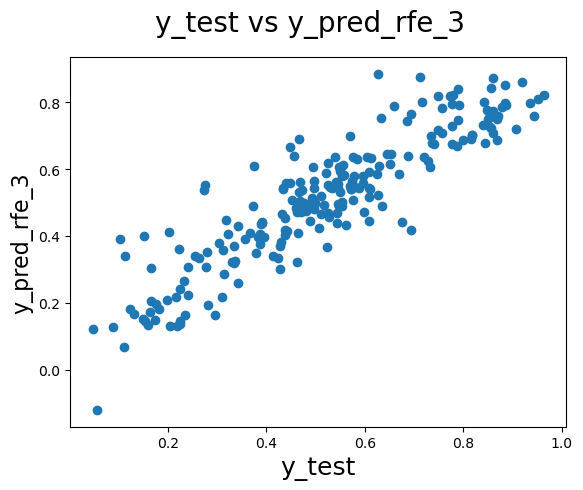

In [52]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_rfe_3)
fig.suptitle('y_test vs y_pred_rfe_3', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_rfe_3', fontsize = 16)   

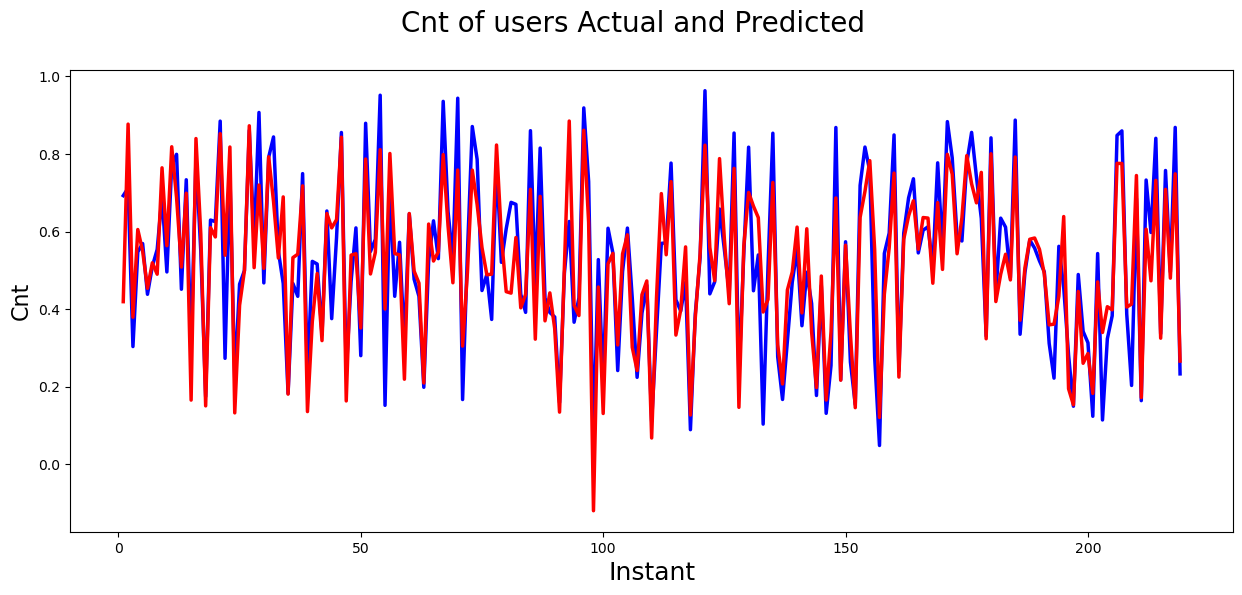

In [53]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=[15,6])
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_rfe_3, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Cnt of users Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Instant', fontsize=18)                               # X-label
plt.ylabel('Cnt', fontsize=16)
plt.show()

#### Asumption 3: Error terms are independent of each other
#### Asumption 4:Error terms have constant variance (homoscedasticity)

Text(0, 0.5, 'y_test-y_pred_rfe_3')

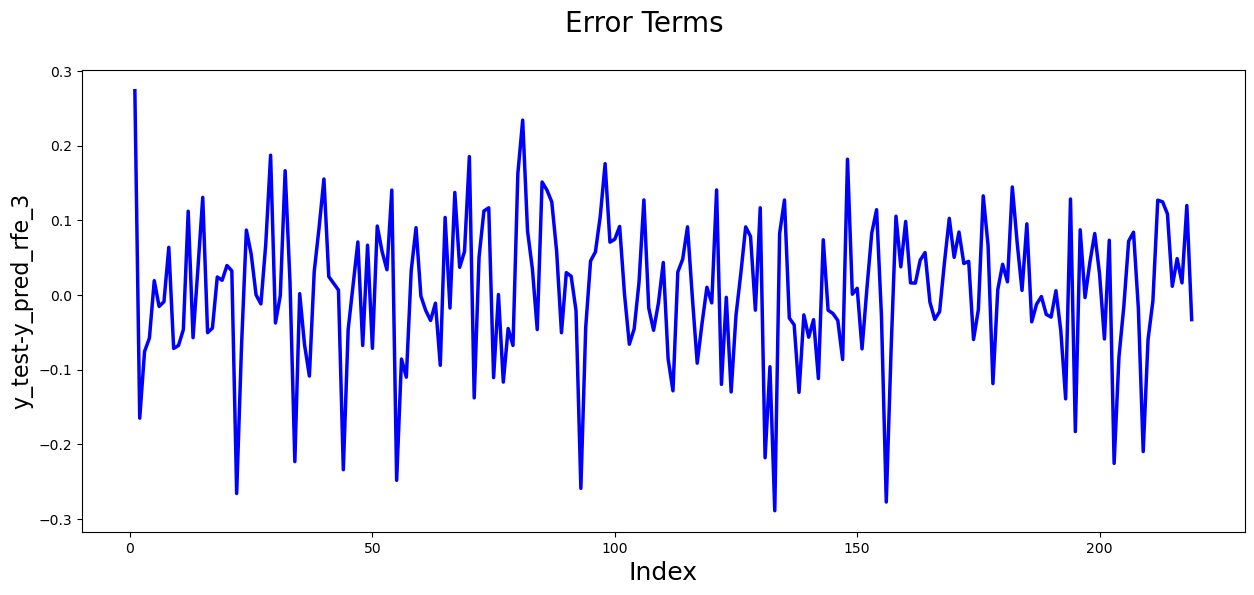

In [54]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=[15,6])
plt.plot(c,y_test-y_pred_rfe_3, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_pred_rfe_3', fontsize=16)                # Y-label

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rfe_3)

0.8074932398585606

<h1><center>6. Conclusion</center></h1>


**R2-Squared of lm_rfe_3 model is 0.832 where as r2_score on test data is 0.807. Which we can see difference of 2.5**

**Overall the model lm_rfe_3 we developed is decent model.**

We can see that the equation of our best fitted line is:

$ cnt = 0.2635  \times  +  0.2356  \times  year + 0.3883  \times  temp - 0.1535 \times windspeed - 0.1467 \times Spring + 0.0515 \times working_day - 0.2821 \times Light_Snow_Rain - 0.0834 \times Mist_Cloudy - 0.0710 \times July + 0.0531 \times Sep + 0.0641 \times Sun $

    
**The top 8 variables that are seen significant in predicting the demand for shared bikes are as follows:**

Positively correlated top 4 variables:

* Temperature   :  0.3883
* Year	        :  0.2356
* Sunday        :  0.0641
* working_day	:  0.0515


Negatively correlated top 4 variables:

* Light_Snow_Rain	        : -0.2821
* windspeed : -0.1535
* Spring Season : -0.1467
* Mist_Cloudy : -0.0834

